In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Defense%20contractors%20market%20cap%2C%20revenue%2C%20earnings/defense%20contractor.csv")

In [3]:
df.head()

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2022,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$11.91 B,NaN,NaN
1,BA,2001,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$30.94 B,$58.19 B,NaN
2,BA,2002,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$26.37 B,$54.06 B,NaN
3,BA,2003,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$33.72 B,$50.48 B,NaN
4,BA,2004,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,$43.08 B,$52.51 B,NaN


In [4]:
df.describe()

,Year
count,269.000000
mean,2012.672862
std,6.039426
min,2001.000000
25%,2008.000000
50%,2013.000000
75%,2018.000000
max,2022.000000


In [5]:
df.nunique()

Symbol         17
Year           22
Name           17
Country         7
Category       12
Market cap    250
Revenue       184
Earnings      151
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of     Symbol  Year               Name Country  \
0    AM.PA  2022  Dassault Aviation  France   
1       BA  2001             Boeing     USA   
2       BA  2002             Boeing     USA   
3       BA  2003             Boeing     USA   
4       BA  2004             Boeing     USA   
..     ...   ...                ...     ...   
264  SAFRF  2018             Safran  France   
265  SAFRF  2019             Safran  France   
266  SAFRF  2020             Safran  France   
267  SAFRF  2021             Safran  France   
268  SAFRF  2022             Safran  France   

                                              Category Market cap   Revenue  \
0    Aircraft manufacturers|Defense contractors|Man...   $11.91 B       NaN   
1    Aircraft manufacturers|Aerospace|Dow jones|Man...   $30.94 B  $58.19 B   
2    Aircraft manufacturers|Aerospace|Dow jones|Man...   $26.37 B  $54.06 B   
3    Aircraft manufacturers|Aerospace|Dow jones|Man...   $33.72 B  $50.48 B   
4    Air

In [7]:
df.isnull().sum()

Symbol         0
Year           0
Name           0
Country        0
Category       0
Market cap    15
Revenue       80
Earnings      98
dtype: int64

In [8]:
df.Name = df.Name.astype('string')
df.Country = df.Country.astype('string')
df.Category = df.Category.astype('string')
df.Symbol = df.Symbol.astype('string')
df.Year = pd.to_datetime(df['Year'],format='%Y')
df['Year'] = df.Year.dt.year
df.Revenue = df.Revenue.astype("string")
array = df.Revenue.str.split("$",n = 1, expand = True)[:] # Spliting string with $ and taking only 2nd element without $
df.Revenue = array[1]
array = df.Revenue.str.split(" ",n = 1, expand = True)[:] # Spliting string with {Blank Space} and taking only 2nd element without B (Billion)
df.Revenue = array[0]
df.Revenue = pd.to_numeric(df.Revenue, errors='coerce').astype(np.float32)
df.Revenue

0            NaN
1      58.189999
2      54.060001
3      50.480000
4      52.509998
         ...    
264          NaN
265          NaN
266          NaN
267          NaN
268          NaN
Name: Revenue, Length: 269, dtype: float32

In [9]:
df['Market cap'] = df['Market cap'].astype('string')
array = df['Market cap'].str.split('$',n = 1, expand = True)[:]
df['Market cap'] = array[1]
array = df['Market cap'].str.split(" ",n=1,expand = True)[:]
df['Market cap']= array[0]
df['Market cap'] = pd.to_numeric(df['Market cap'],errors ='coerce').astype(np.float32)
df['Market cap']

0      11.910000
1      30.940001
2      26.370001
3      33.720001
4      43.080002
         ...    
264    52.360001
265    65.480003
266    60.880001
267    52.020000
268    46.599998
Name: Market cap, Length: 269, dtype: float32

In [10]:
df.Earnings = df.Earnings.astype("string")
array = df.Earnings.str.split("$",n = 1, expand = True)[:]
df.Earnings = array[1]
array = df.Earnings.str.split(" ",n = 1, expand = True)[:]
df.Earnings = array[0]
df.Earnings = pd.to_numeric(df.Earnings, errors='coerce').astype(np.float32)
df.Earnings

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
264   NaN
265   NaN
266   NaN
267   NaN
268   NaN
Name: Earnings, Length: 269, dtype: float32

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      269 non-null    string 
 1   Year        269 non-null    int64  
 2   Name        269 non-null    string 
 3   Country     269 non-null    string 
 4   Category    269 non-null    string 
 5   Market cap  254 non-null    float32
 6   Revenue     189 non-null    float32
 7   Earnings    171 non-null    float32
dtypes: float32(3), int64(1), string(4)
memory usage: 13.8 KB


In [12]:
df.head()

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2022,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,11.910000,NaN,NaN
1,BA,2001,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,30.940001,58.189999,NaN
2,BA,2002,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,26.370001,54.060001,NaN
3,BA,2003,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,33.720001,50.480000,NaN
4,BA,2004,Boeing,USA,Aircraft manufacturers|Aerospace|Dow jones|Man...,43.080002,52.509998,NaN


In [13]:
def find_minmax(x):
    min_index= df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    print('Company with the Highest ' + x + ':',df['Name'][high_index])
    print('Company with the Lowest ' + x + ':',df['Name'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('Market cap')

Company with the Highest Market cap: Boeing
Company with the Lowest Market cap: Bharat Electronics


,19,26
Symbol,BA,BEL.NS
Year,2019,2008
Name,Boeing,Bharat Electronics
Country,USA,India
Category,Aircraft manufacturers|Aerospace|Dow jones|Man...,Electronics|Aerospace|Defense contractors
Market cap,183.369995,0.78
Revenue,76.550003,NaN
Earnings,NaN,NaN


Text(0.5, 0, 'Market Cap')

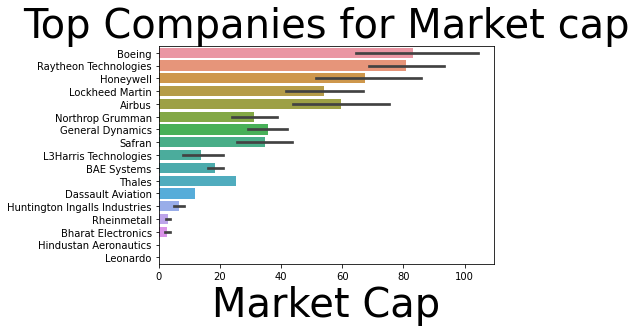

In [14]:
info = pd.DataFrame(df['Market cap'].sort_values(ascending = False))
info['Name'] = df['Name']
data = list(map(str,(info['Name'])))
x = list(data[:])
y = list(info['Market cap'][:])

ax = sns.barplot(x=y,y=x)

sns.set(rc={'figure.figsize':(30,15)})
ax.set_title('Top Companies for Market cap',fontsize = 40)
ax.set_xlabel('Market Cap',fontsize =40)

In [15]:
find_minmax('Revenue')

Company with the Highest Revenue: Boeing
Company with the Lowest Revenue: L3Harris Technologies


,18,149
Symbol,BA,LHX
Year,2018,2001
Name,Boeing,L3Harris Technologies
Country,USA,USA
Category,Aircraft manufacturers|Aerospace|Dow jones|Man...,Defense contractors
Market cap,183.059998,2.01
Revenue,101.120003,1.9
Earnings,NaN,0.13


Text(0.5, 0, 'Revenue')

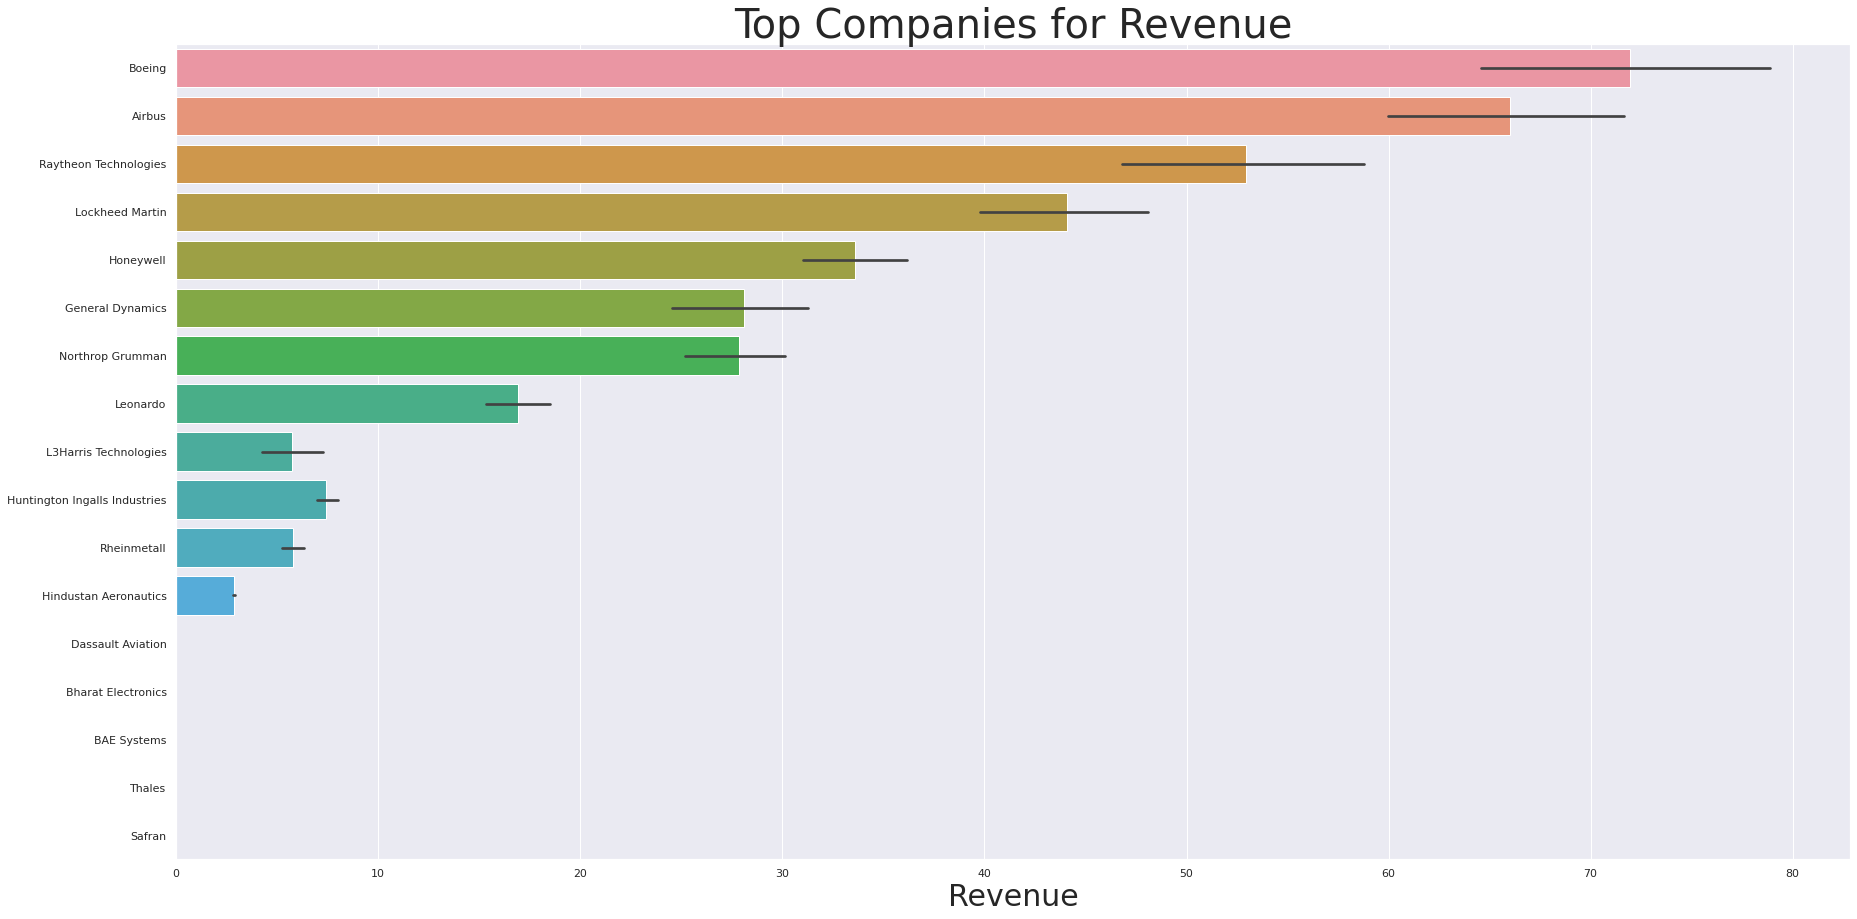

In [16]:
info = pd.DataFrame(df['Revenue'].sort_values(ascending = False))
info['Name'] = df['Name']
data = list(map(str,(info['Name'])))
x = list(data[:])
y = list(info['Revenue'][:])

ax = sns.barplot(x=y,y=x)

sns.set(rc={'figure.figsize':(30,15)})
sns.set_style('darkgrid')
ax.set_title('Top Companies for Revenue',fontsize = 40)
ax.set_xlabel('Revenue',fontsize =30)

In [17]:
df["Name"].value_counts()

Raytheon Technologies            22
General Dynamics                 22
Boeing                           22
Honeywell                        22
L3Harris Technologies            22
Lockheed Martin                  22
Northrop Grumman                 22
BAE Systems                      22
Rheinmetall                      18
Bharat Electronics               18
Safran                           14
Airbus                           14
Huntington Ingalls Industries    13
Leonardo                         12
Hindustan Aeronautics             2
Dassault Aviation                 1
Thales                            1
Name: Name, dtype: Int64

In [18]:
df["Category"].value_counts()

Aerospace|Defense contractors                                         58
Defense contractors                                                   57
Aircraft manufacturers|Aerospace|Dow jones|Manufacturing              22
Defense contractors|Aerospace                                         22
Dow jones|Aerospace|Defense contractors                               22
Aerospace|Defense contractors|Aircraft manufacturers|Manufacturing    22
Electronics|Aerospace|Defense contractors                             18
Automotive Suppliers|Defense contractors                              18
Aircraft manufacturers|Aerospace|CAC 40|Manufacturing|DAX             14
CAC 40|Aerospace|Defense contractors                                  14
Aircraft manufacturers|Defense contractors|Manufacturing               1
Defense contractors|CAC 40                                             1
Name: Category, dtype: Int64

In [19]:
country_count =df['Country'].value_counts()

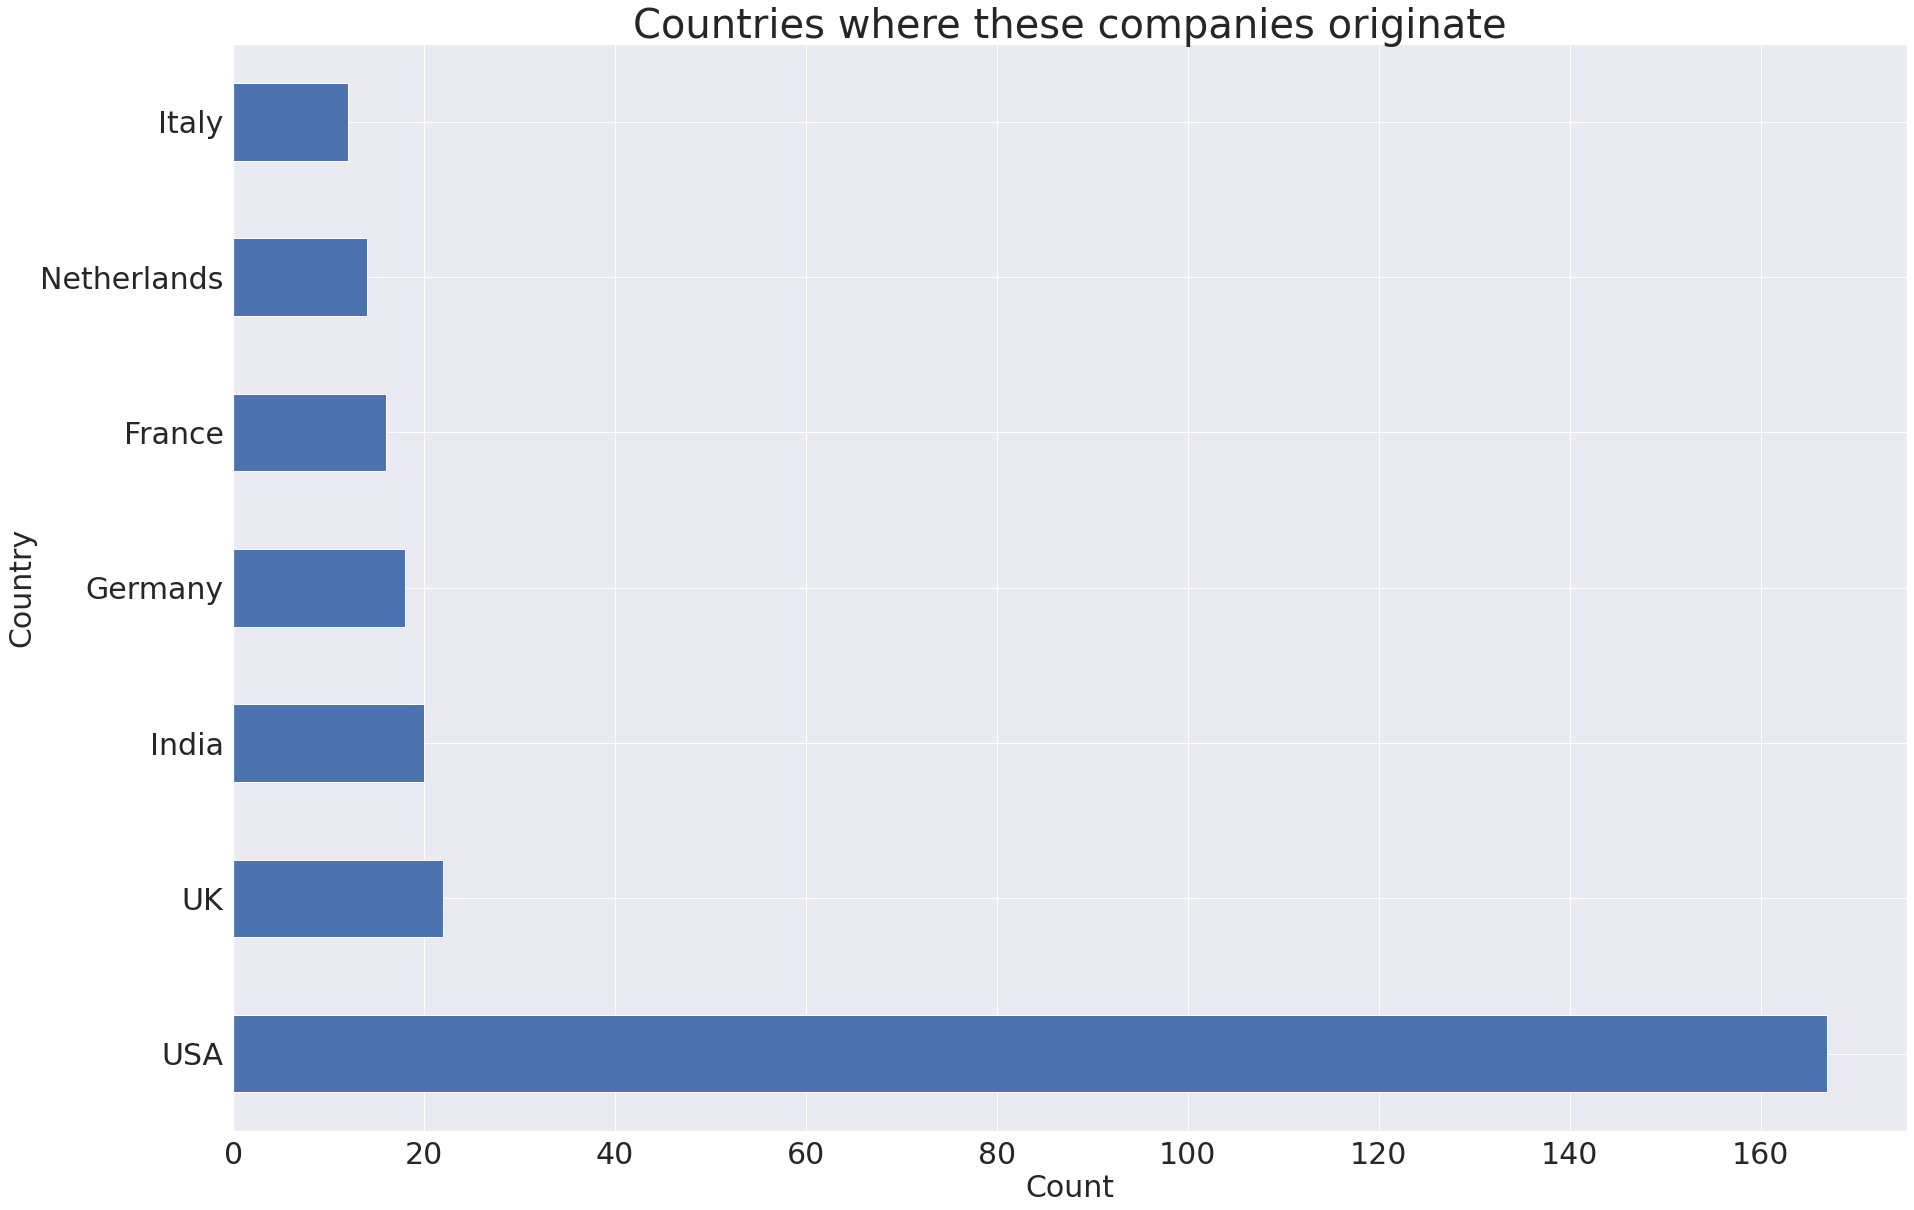

In [20]:
country_count.plot(kind='barh',figsize=(30,20), fontsize =30)
plt.title('Countries where these companies originate',fontsize =40)
plt.xlabel('Count', fontsize=30)
plt.ylabel('Country',fontsize = 30)
sns.set_style('darkgrid')

In [21]:
cat_count = df['Category'].value_counts()

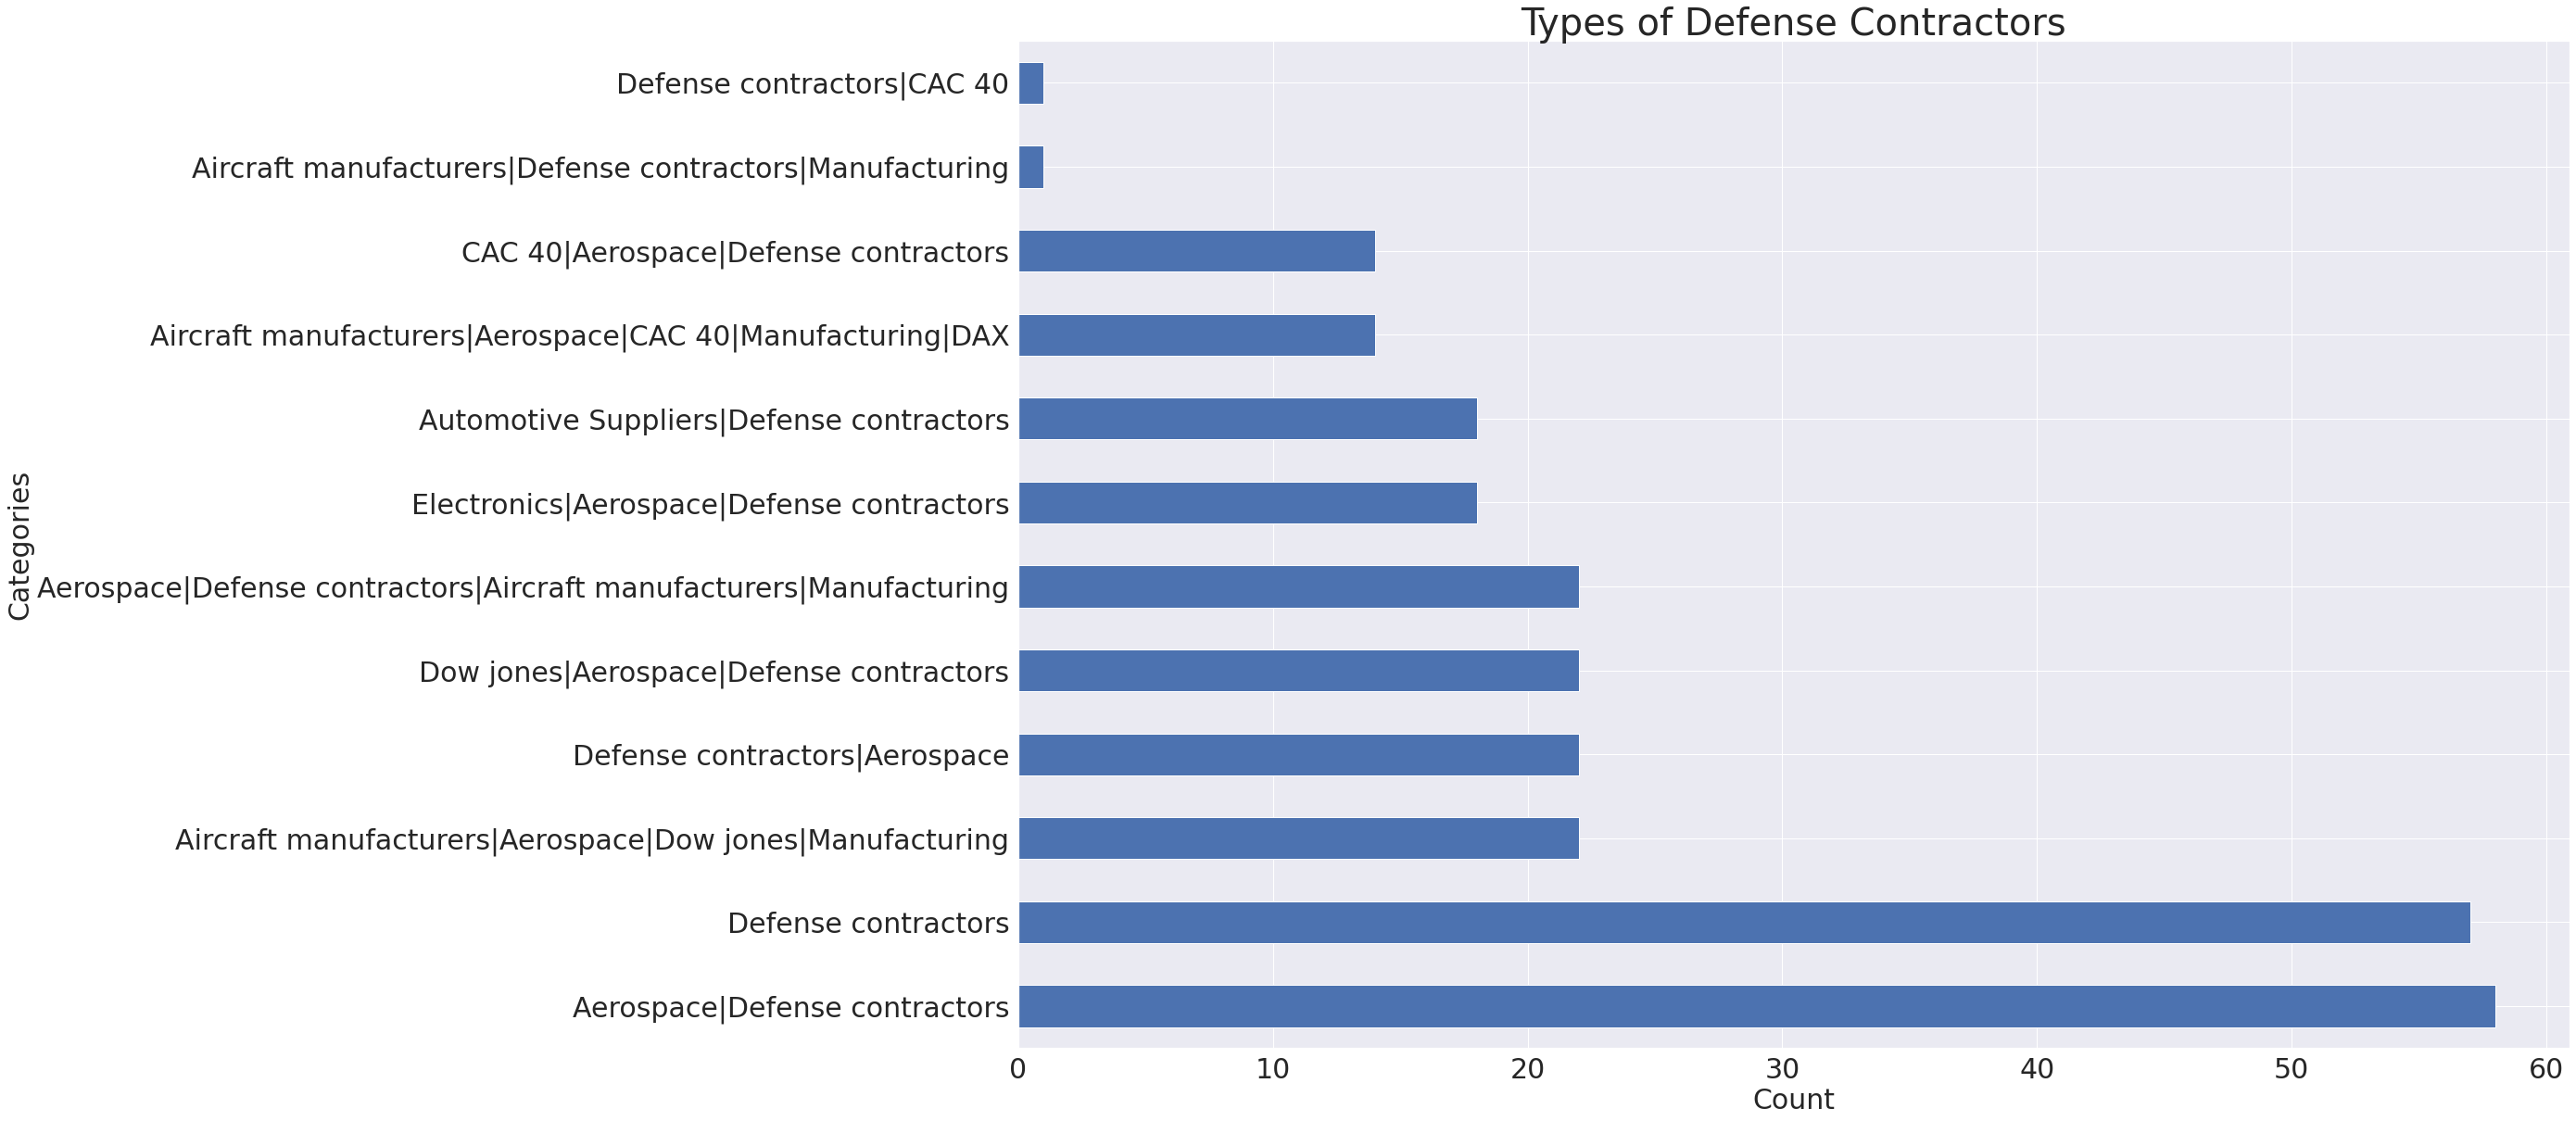

In [22]:
cat_count.plot(kind='barh', figsize=(30,20),fontsize = 30)
plt.title('Types of Defense Contractors',fontsize = 40)
plt.xlabel('Count', fontsize =30)
plt.ylabel('Categories',fontsize = 30)
sns.set_style('darkgrid')

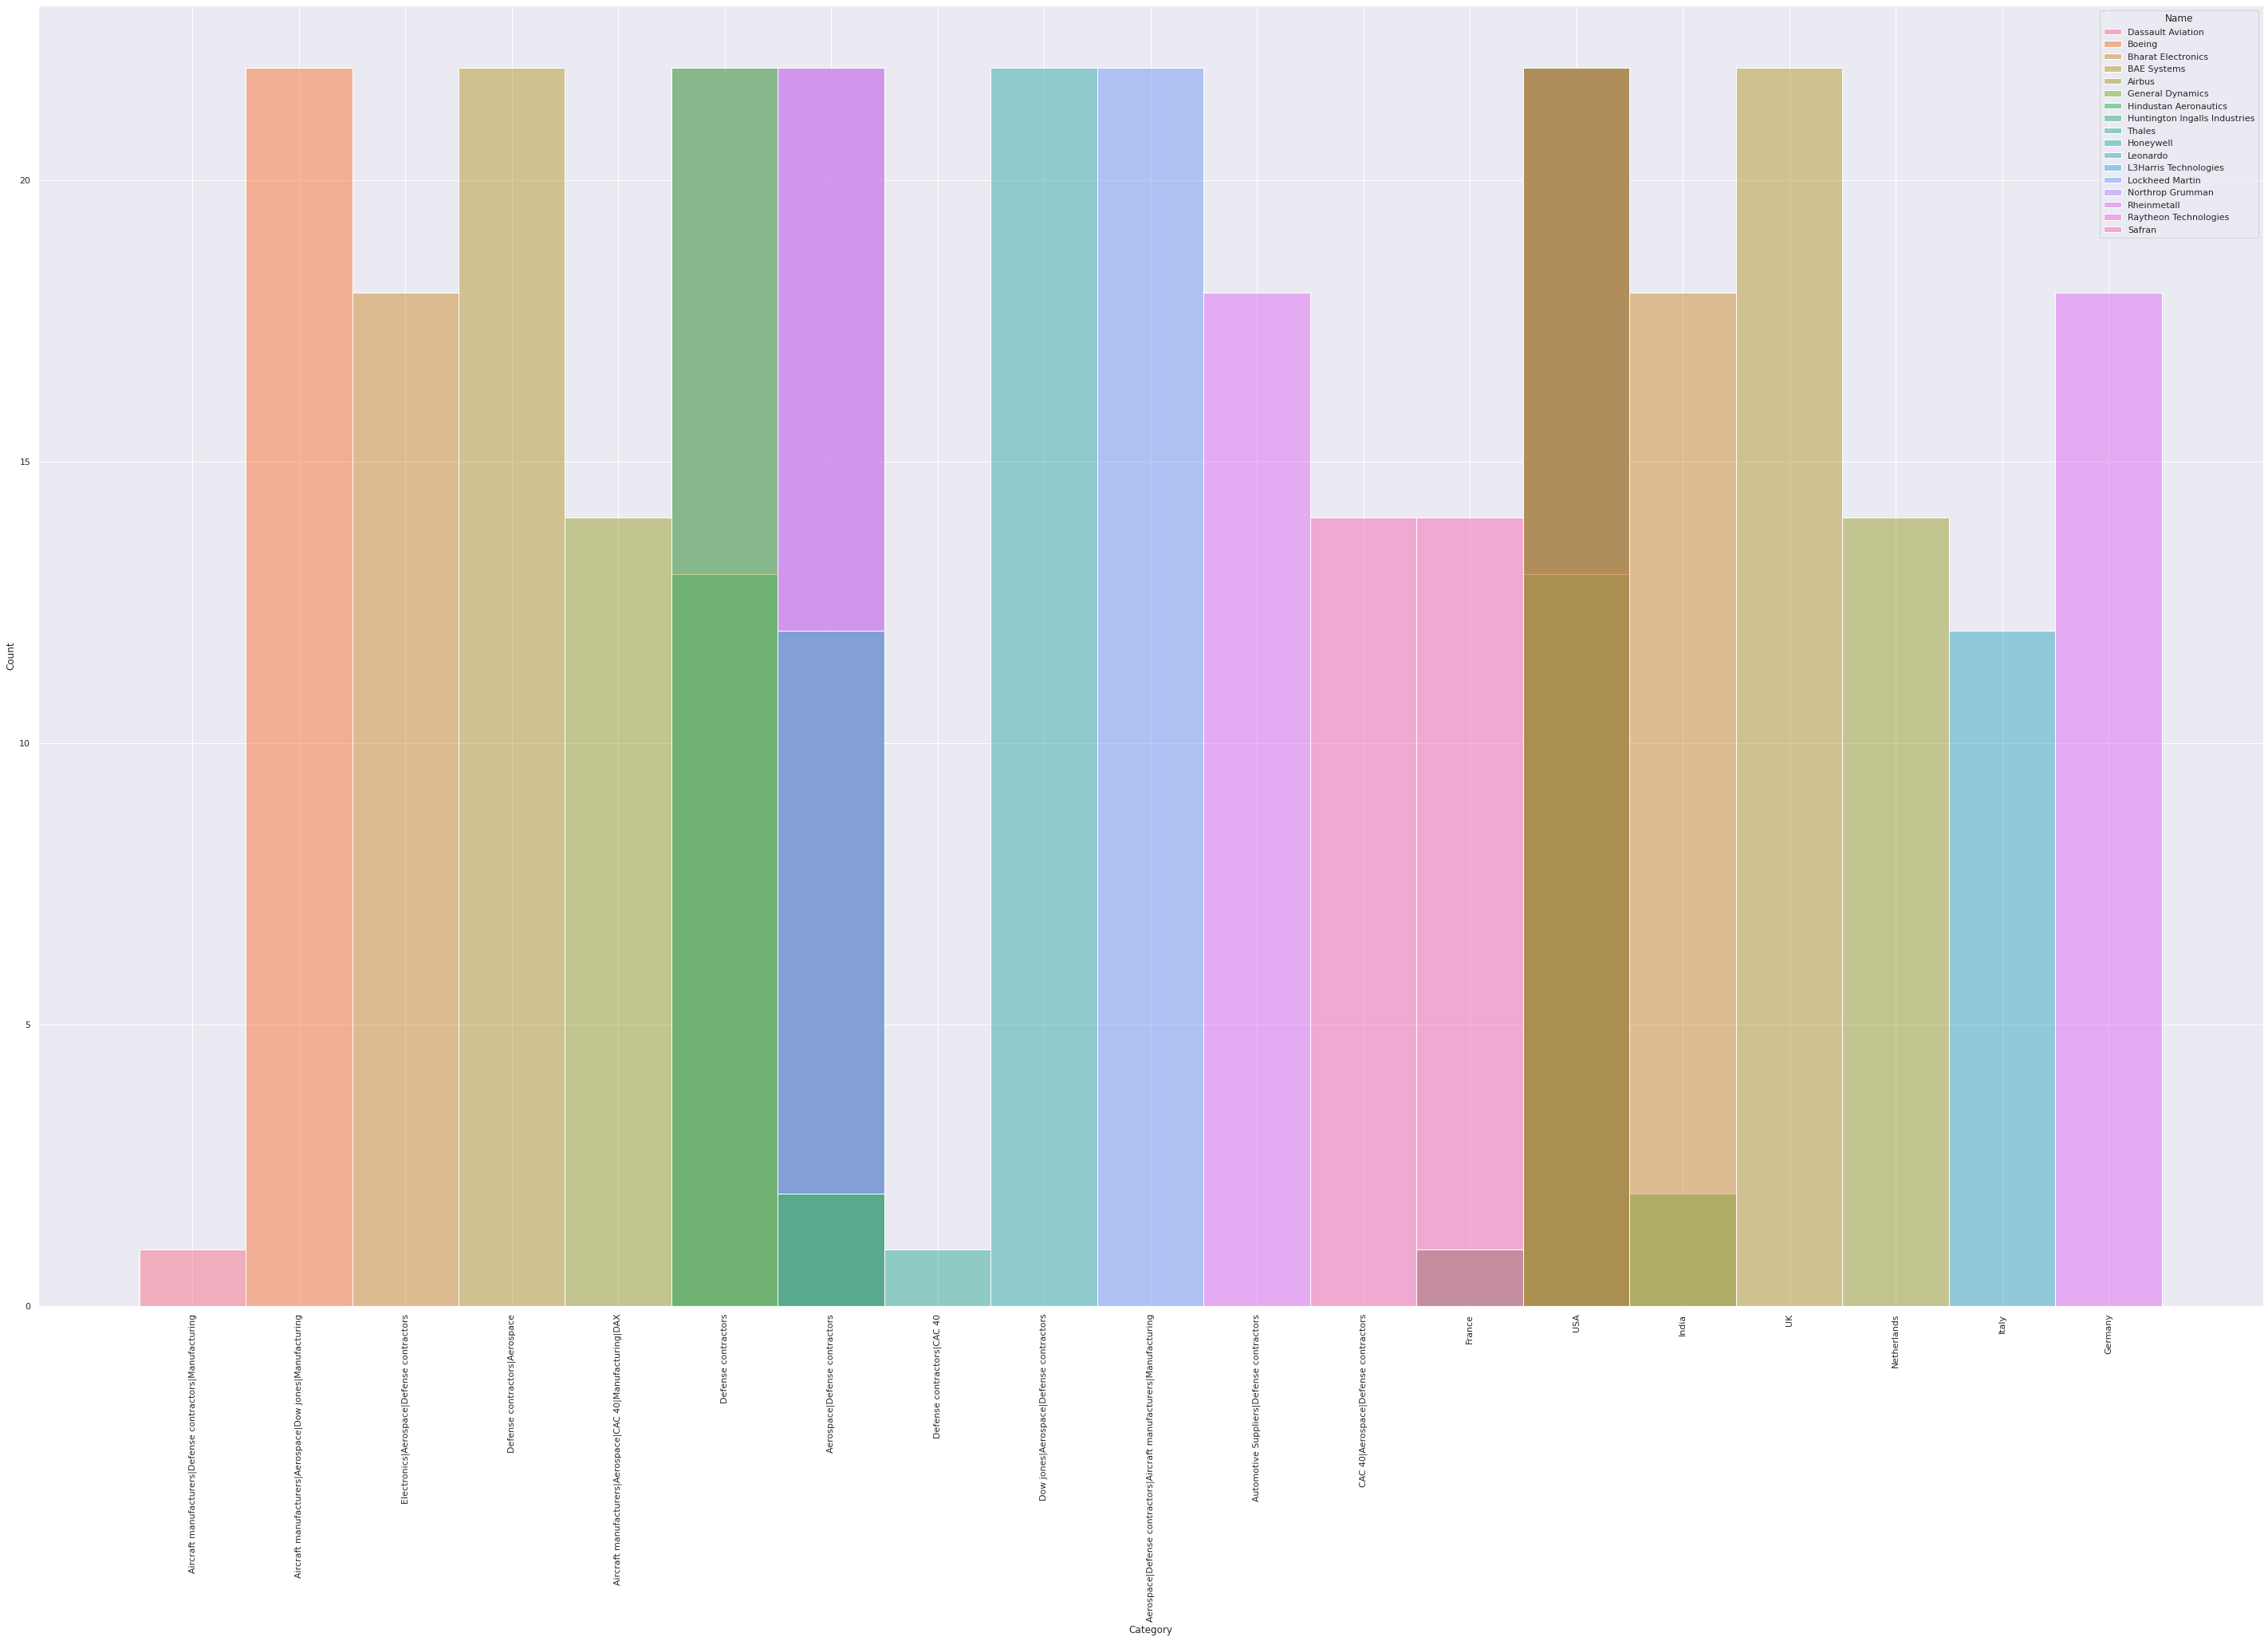

In [23]:
var = ['Category','Country']

for v in var:
    sns.set(rc={'figure.figsize':(50,30)})
    sns.histplot(x = v, data = df, hue = 'Name',legend='auto',color='viridis',multiple='layer')
    plt.xticks(rotation =90)

In [24]:
fig = px.scatter(df, x = df['Name'], y = df['Category'],symbol = df['Country'],title = 'Name and Category with Company')
fig.show()

In [25]:
fig = px.funnel(x=df['Name'],y=df['Category'],color = df['Country'])
fig.show()